In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import anndata as ad
import scipy as sp

In [2]:
adata = sc.read_h5ad('../../data/from_spatial_omics/STARmap/STARmap_Wang2018three_data_2D_zstep15_0_data.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4666 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [4]:
adata.X.todense()

matrix([[   930.,    349.,   5073., ...,  20941., 187343., 180822.],
        [ 30967.,    571.,    555., ...,   8198.,  33515.,   9260.],
        [ 27142.,   3182.,  48825., ...,   5006.,  53487.,  12058.],
        ...,
        [ 96768.,   2850.,    795., ...,  27050.,  16289.,   3674.],
        [  7646.,   1174.,   1222., ...,  17812.,   7974.,   3200.],
        [ 82739.,   3481.,  35386., ...,  30536.,  24547.,  10098.]],
       dtype=float32)

In [5]:
sc.pp.calculate_qc_metrics(adata, inplace=True, percent_top=[10])

In [6]:
adata.layers['counts'] = adata.X.copy()

In [7]:
# sc.pp.filter_cells(adata, min_genes=10)
# sc.pp.filter_genes(adata, min_cells=500)

In [8]:
adata

AnnData object with n_obs × n_vars = 4666 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

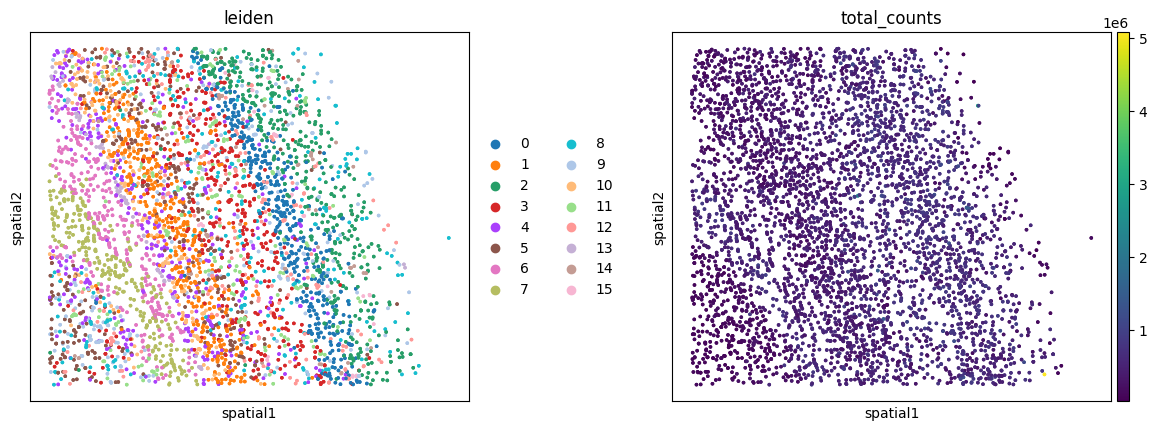

In [9]:
sq.pl.spatial_scatter(adata, color=['leiden', 'total_counts'], size=10, shape=None)

In [10]:
# remove MT genes
non_mito_genes_list = [name for name in adata.var_names if not name.startswith('mt-')]
adata = adata[:, non_mito_genes_list]

In [11]:
adata

View of AnnData object with n_obs × n_vars = 4666 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [12]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [13]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(adata, mode="moran", 
                       n_perms=100, n_jobs=10, 
                       genes=adata.var_names)

100%|██████████| 100/100 [00:08<00:00, 11.50/s]


In [14]:
adata.uns['moranI']

I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
Npy      0.876042        0.0  0.000074         0.0  0.009901  0.000135   
Slc17a7  0.804834        0.0  0.000074         0.0  0.009901  0.000152   
Egr1     0.804816        0.0  0.000074         0.0  0.009901  0.000153   
Pvalb    0.785619        0.0  0.000074         0.0  0.009901  0.000133   
Pcp4     0.754411        0.0  0.000074         0.0  0.009901  0.000144   
Mbp      0.743208        0.0  0.000074         0.0  0.009901  0.000177   
Sst      0.741346        0.0  0.000074         0.0  0.009901  0.000126   
Vip      0.713274        0.0  0.000074         0.0  0.009901  0.000108   
Flt1     0.687994        0.0  0.000074         0.0  0.009901  0.000166   
Cux2     0.673977        0.0  0.000074         0.0  0.009901  0.000135   
Mgp      0.659367        0.0  0.000074         0.0  0.009901  0.000149   
Plcxd2   0.644946        0.0  0.000074         0.0  0.009901  0.000138   
Cck      0.644652        0.0  0.000074         0.0  0.009901  0.000133   
Fos      0.613341        0.0  0.000074         0.0  0.009901  0.000145   
Calb2    0.610870        0.0  0.000074         0.0  0.009901  0.000107   
Prok2    0.566625        0.0  0.000074         0.0  0.009901  0.000138   
Bdnf     0.538924        0.0  0.000074         0.0  0.009901  0.000132   
Rasgrf2  0.505712        0.0  0.000074         0.0  0.009901  0.000090   
Rorb     0.477372        0.0  0.000074         0.0  0.009901  0.000096   
Egr2     0.439339        0.0  0.000074         0.0  0.009901  0.000101   
Gad1     0.416154        0.0  0.000074         0.0  0.009901  0.000077   
Reln     0.406858        0.0  0.000074         0.0  0.009901  0.000113   
Ctgf     0.377153        0.0  0.000074         0.0  0.009901  0.000102   
Sema3e   0.313785        0.0  0.000074         0.0  0.009901  0.000091   
Gja1     0.289568        0.0  0.000074         0.0  0.009901  0.000064   
Sulf2    0.278797        0.0  0.000074         0.0  0.009901  0.000065   
Ctss     0.248073        0.0  0.000074         0.0  0.009901  0.000080   
Nov      0.185206        0.0  0.000074         0.0  0.009901  0.000056   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
Npy                   0.0                0.0         0.009901  
Slc17a7               0.0                0.0         0.009901  
Egr1                  0.0                0.0         0.009901  
Pvalb                 0.0                0.0         0.009901  
Pcp4                  0.0                0.0         0.009901  
Mbp                   0.0                0.0         0.009901  
Sst                   0.0                0.0         0.009901  
Vip                   0.0                0.0         0.009901  
Flt1                  0.0                0.0         0.009901  
Cux2                  0.0                0.0         0.009901  
Mgp                   0.0                0.0         0.009901  
Plcxd2                0.0                0.0         0.009901  
Cck                   0.0                0.0         0.009901  
Fos                   0.0                0.0         0.009901  
Calb2                 0.0                0.0         0.009901  
Prok2                 0.0                0.0         0.009901  
Bdnf                  0.0                0.0         0.009901  
Rasgrf2               0.0                0.0         0.009901  
Rorb                  0.0                0.0         0.009901  
Egr2                  0.0                0.0         0.009901  
Gad1                  0.0                0.0         0.009901  
Reln                  0.0                0.0         0.009901  
Ctgf                  0.0                0.0         0.009901  
Sema3e                0.0                0.0         0.009901  
Gja1                  0.0                0.0         0.009901  
Sulf2                 0.0                0.0         0.009901  
Ctss                  0.0                0.0         0.009901  
Nov                   0.0                0.0         0.009901

In [15]:
top_autocorr = (
    adata.uns["moranI"]["I"].sort_values(ascending=False).head(25).index.tolist()
)

In [16]:
# select top 50 variable genes as reference
adata = adata[:, top_autocorr]

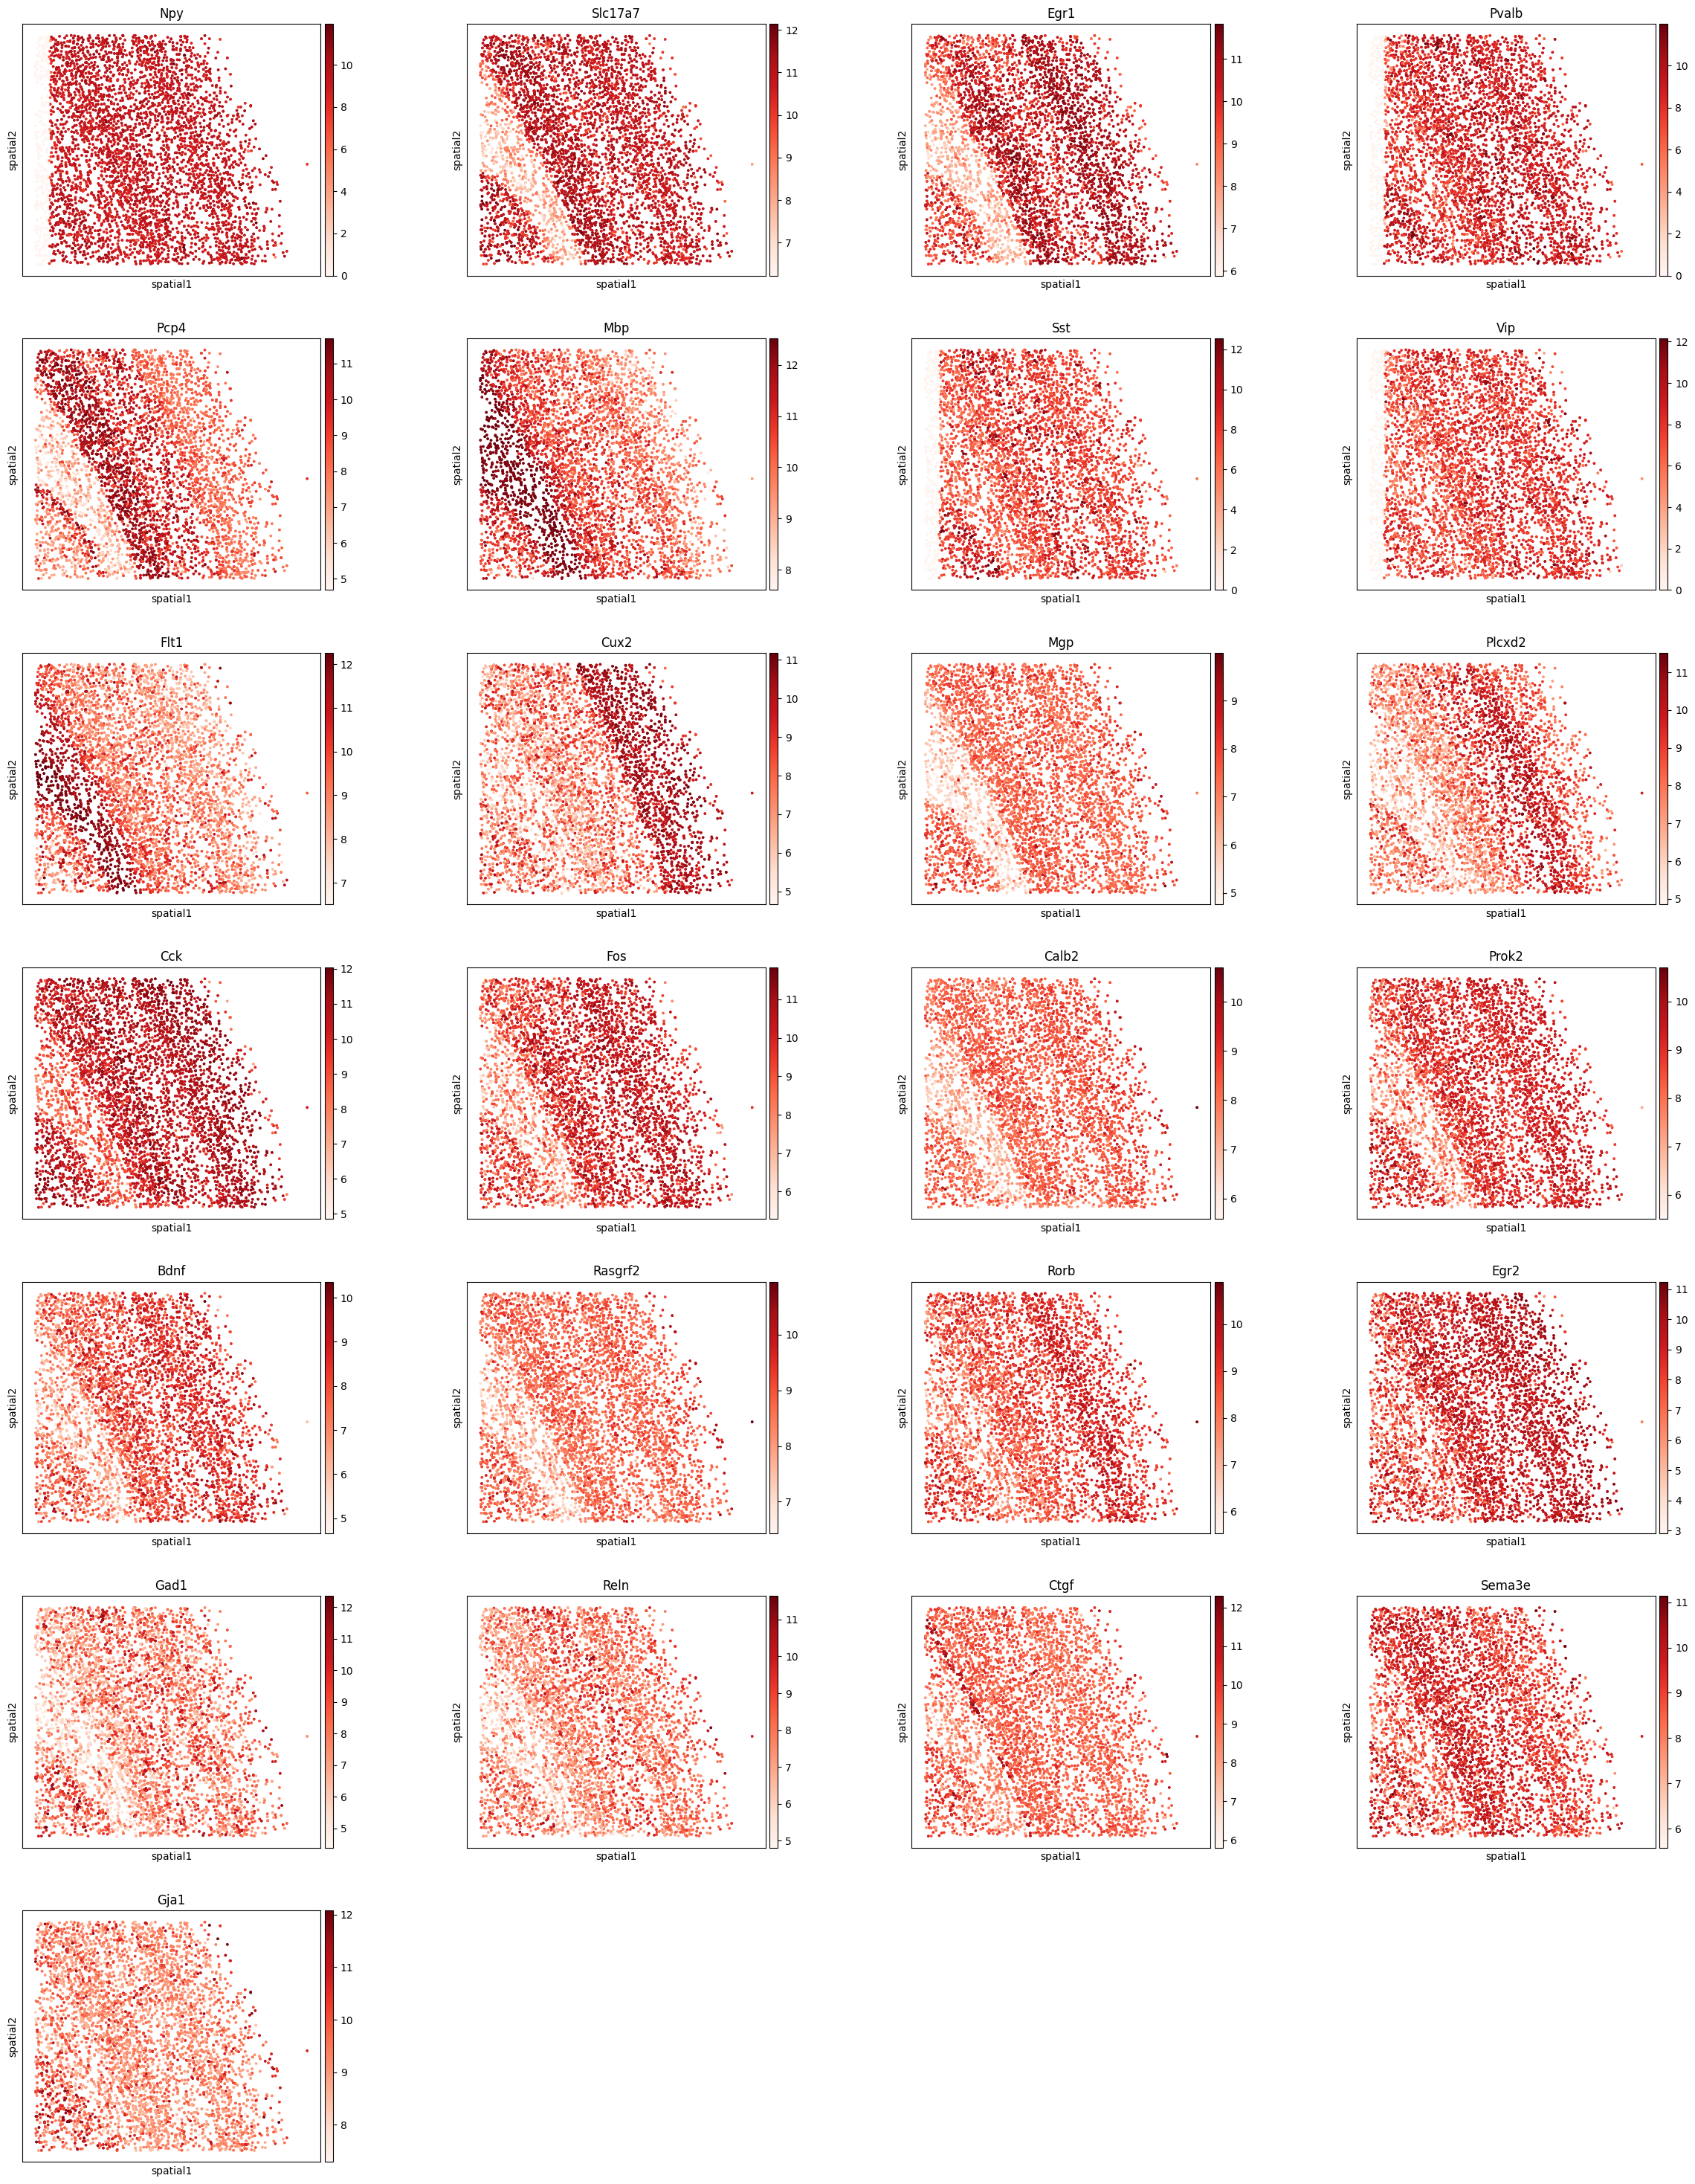

In [17]:
sq.pl.spatial_scatter(
    adata, color=top_autocorr, size=10, 
    cmap="Reds", use_raw=False, shape=None
)

In [18]:
adata

View of AnnData object with n_obs × n_vars = 4666 × 25
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap', 'log1p'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [19]:
adata.write_h5ad('../../results/00_prepare_reference_data/50_STARmap_Wang2018_2D_zstep15_0.h5ad')